In [14]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

%matplotlib inline

In [3]:
df = pd.read_csv('data/datatran2017.csv', sep=';', encoding="latin1")
df.shape

(89518, 30)

In [4]:
df.head(2)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,8,2017-01-01,domingo,00:00:00,PR,376.0,112,PARANAVAI ...,Fenômenos da Natureza ...,Queda de ocupante de veículo ...,...,1,0,0,1,1,-23.098807,-52.387894,SR-PR,DEL7/7,UOP05/PR
1,9,2017-01-01,domingo,00:01:00,SC,101.0,234,PALHOCA ...,Falta de Atenção à Condução ...,Colisão com objeto estático ...,...,0,1,0,0,1,-27.810100,-48.635700,SR-SC,DEL8/1,UOP02/SC


In [25]:
weekdays = {
    'sábado': 'saturday',
    'domingo': 'sunday',
    'sexta-feira': 'friday',
    'segunda-feira': 'monday',
    'quinta-feira': 'thursday',
    'quarta-feira': 'wednesday',
    'terça-feira': 'tuesday',
}

df['weekday'] = df.dia_semana.apply(lambda x: weekdays[x])

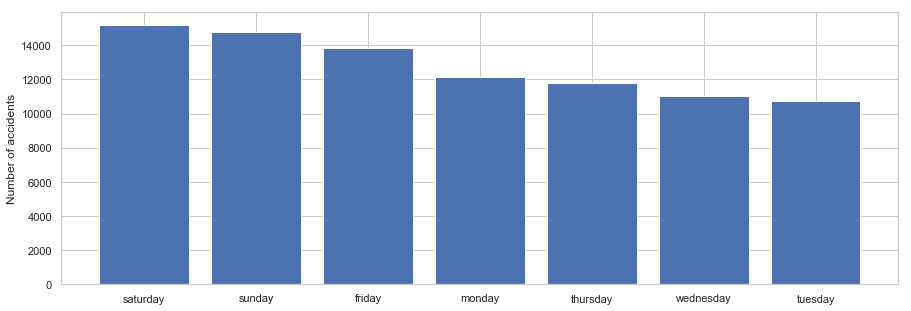

In [26]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(7), df.weekday.value_counts())
ticks = plt.xticks(np.arange(7), df.weekday.value_counts().index)
plt.ylabel('Number of accidents')

In [56]:
accident_type = {
'Colisão traseira': 'rear collision',             
'Saída de leito carroçável': 'carriage bed outlet',        
'Colisão lateral': 'lateral collision',
'Colisão transversal': 'transversal collision',
'Colisão com objeto estático': 'collision with static object',
'Tombamento': 'tipping',
'Colisão frontal': 'frontal collision',
'Atropelamento de Pedestre': 'pedestrian trampling',
'Queda de ocupante de veículo': 'vehicle occupant fall',
'Atropelamento de Animal': 'animal trampling', 
'Engavetamento': 'pestle',      
'Incêndio': 'fire',
'Colisão com objeto em movimento': 'collision with moving object',  
'Derramamento de carga': 'cargo spill',
'Danos eventuais': 'eventual damage',
'Capotamento': 'rollover',
}
df['accident_type'] = df.tipo_acidente.apply(lambda x: accident_type[x.strip()])

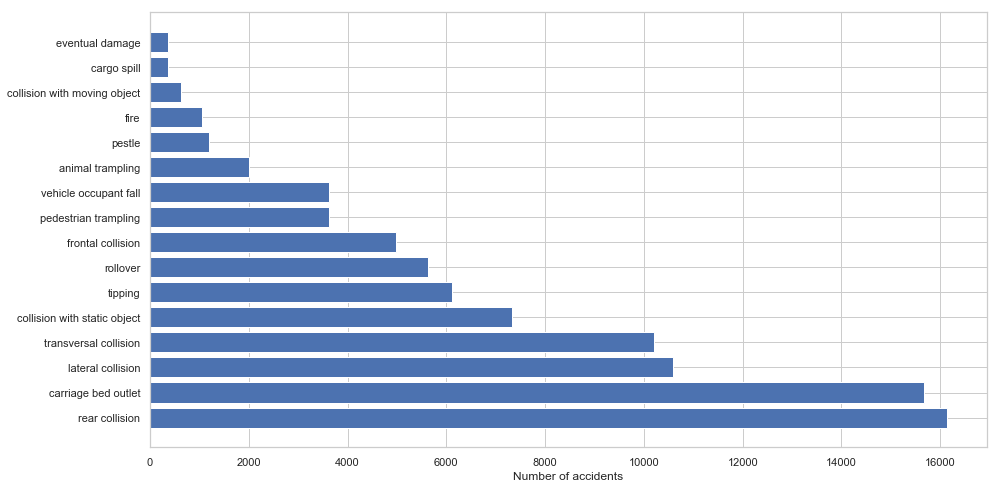

In [57]:
dd = df.accident_type.value_counts()

plt.figure(figsize=(15,8))
plt.barh(np.arange(len(dd)), dd)
ticks = plt.yticks(np.arange(len(dd)), dd.index)
plt.xlabel('Number of accidents')

In [59]:
target = {
    'Sem Vítimas': 'no victims',
    'Com Vítimas Feridas': 'injuried',
    'Com Vítimas Fatais': 'dead'
}

df['target'] = df.classificacao_acidente.apply(lambda x: target[x])

In [124]:
grouped = df.groupby(['accident_type', 'target']).size().unstack()
grouped['type'] = grouped.index
grouped.head()

target,dead,injuried,no victims,type
accident_type,,,,
animal trampling,79,986,946,animal trampling
cargo spill,3,44,325,cargo spill
carriage bed outlet,558,7972,7143,carriage bed outlet
collision with moving object,28,395,204,collision with moving object
collision with static object,249,3093,3986,collision with static object


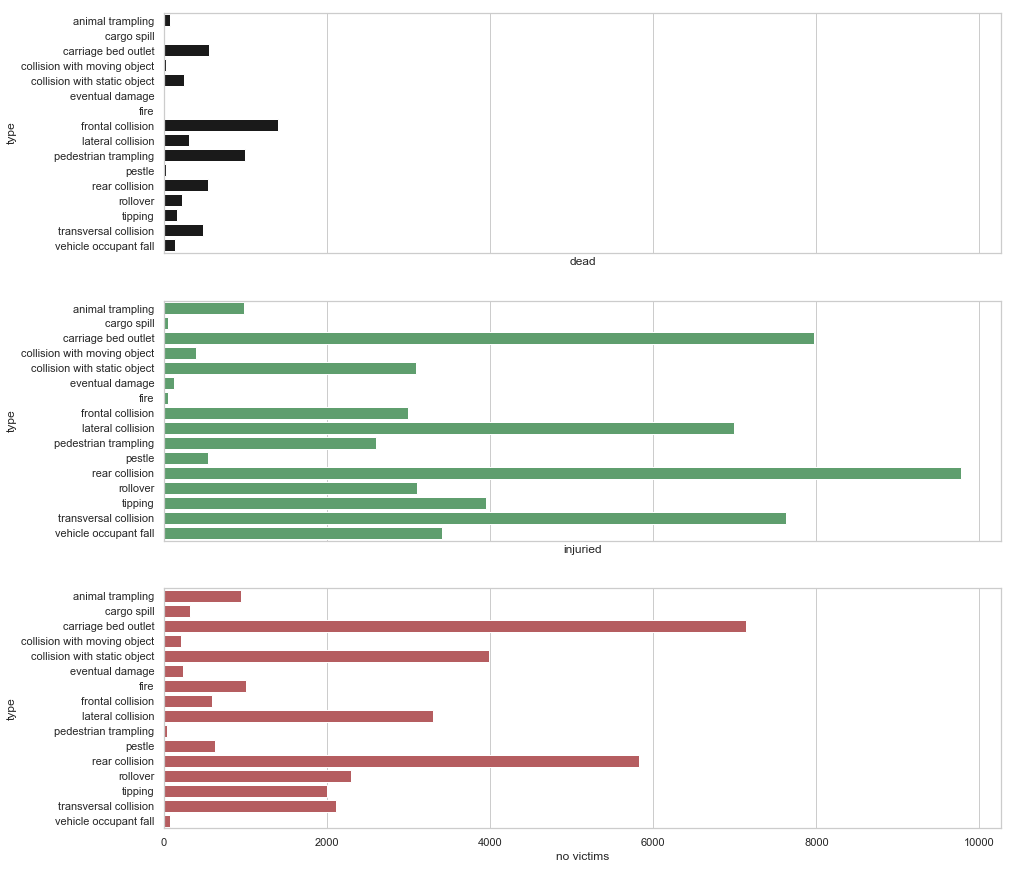

In [120]:
sns.set(style="whitegrid")
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

sns.barplot(x="dead", y="type", data=grouped, label="Dead", color="k", ax=ax1)
sns.barplot(x="injuried", y="type", data=grouped, label="Injuried", color="g", ax=ax2)
sns.barplot(x="no victims", y="type", data=grouped, label="No Victims", color="r", ax=ax3)

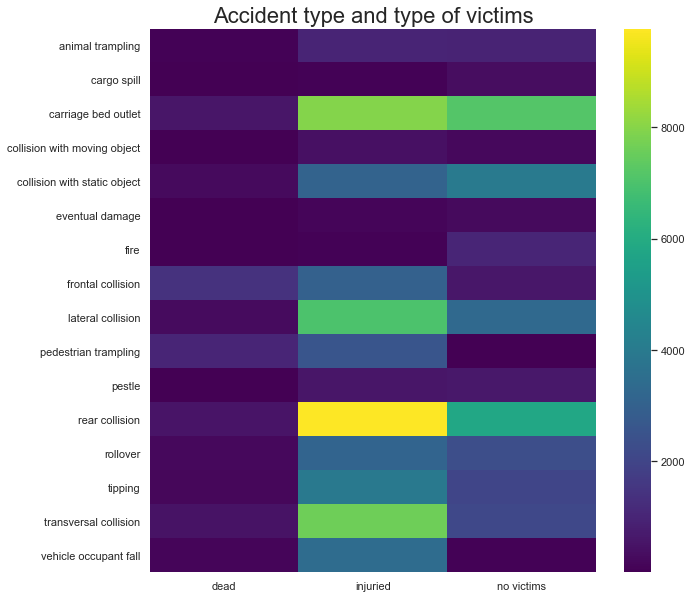

In [151]:
grouped = df.groupby(['accident_type', 'target']).size().unstack()

plt.figure(figsize=(10,10))
sns.heatmap(grouped, cmap='viridis')
plt.title('Accident type and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

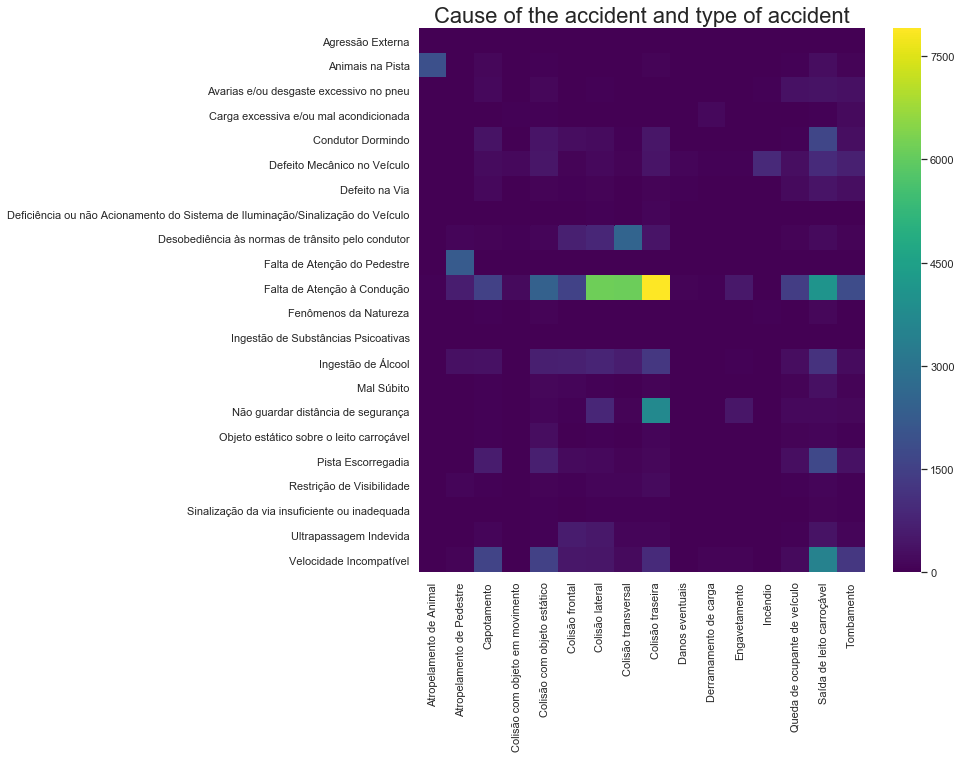

In [150]:
df.causa_acidente = df.causa_acidente.apply(lambda x: x.strip())
df.tipo_acidente = df.tipo_acidente.apply(lambda x: x.strip())

gp = df.groupby(['causa_acidente', 'tipo_acidente']).size().unstack()
gp.fillna(0, inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(gp, cmap='viridis')
plt.title('Cause of the accident and type of accident', fontsize=22)
plt.ylabel('')
plt.xlabel('')

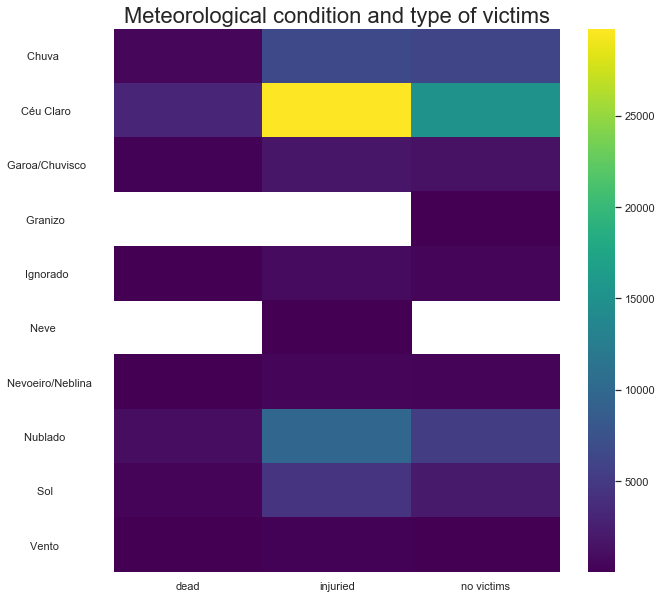

In [149]:
grouped = df.groupby(['condicao_metereologica', 'target']).size().unstack()

plt.figure(figsize=(10,10))
sns.heatmap(grouped, cmap='viridis')
plt.title('Meteorological condition and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')